In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Konlpy_Hannanum

# 한글 폰트 설정

In [2]:
# 한 번 돌리고 런타임 재시작 후 다시 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/content/drive/MyDrive/Colab Notebooks/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 129496 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [3]:
!pip install konlpy

import pandas as pd
import numpy as np


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!python3 -m pip install konlpy 
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
curl is already the newest version (7.68.0-1ubuntu2.15).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless python-pip-whl python3-setuptools python3-wheel
  x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic python

In [5]:
# 파일 불러오기

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DBdata1.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3344 entries, 0 to 3343
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cate     3344 non-null   object 
 1   brand    3344 non-null   object 
 2   pname    3344 non-null   object 
 3   price    3344 non-null   object 
 4   tstar    3344 non-null   float64
 5   star     3344 non-null   int64  
 6   keyword  3344 non-null   object 
 7   rv       3344 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 209.1+ KB


In [6]:
df['rv'].value_counts()

잘 쓰고 있어요.\n추천합니다\n잘 쓰고 있어요.\n추천합니다\n,                                                                                                                                                                                                                                                                                                                                                                                                                               6
저는 이제 이 픽서 없으면 화장 못 함.. 지금도 한통 쟁여뒀어요 \n퍼프에 픽서 뿌리고 파데 바른 다음에 화장 다 끝내고 또 한 번 뿌리고 나가면 진짜 짱짱 피부 됩니다..                                                                                                                                                                                                                                                                                                                                                                   4
픽서를 사용하니 확실히 마스크에서 거의 묻지 않고 메이크업 지속력이 올라가는 느낌이었어요! 처음 사용하고 마스크에 피부 화장이 묻어있지 않아 신기했어요\n\n하지만 

In [7]:
a = df['rv']

reviews = a[:30]

In [8]:
from konlpy.tag import Hannanum
Hannanum = Hannanum()

In [9]:
!set -x \
!pip install konlpy \ 
!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [129]:
# 명사 추출

from konlpy.tag import Mecab
tagger = Mecab()

nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    nouns.append(noun)

nouns[:10]

['기존', '사용', '토너', '라이트', '겨울', '토너', '넘버', '즈인', '결', '에센스']

- 불용어사전(stopwords)
 - 형태소 분석을 통해 조사, 접속사 제거 가능
 - 한국어에는 명사에도 불필요한 정보가 많음
 - 빈도가 너무 커서 분석에 방해되는 단어도 제거

In [11]:
stop_words = "주 닝 팁 속 날 다음 화장 지인 제품 피부 기존 사용 토너 넘버 즈인 결 에센스 구매 발림 점성 마무리 후기 효과 부결 피부 나 느낌 번 것 솜 때 저 럼 거 수 전 물 후 듯 영 생각 게 분"
stop_words = stop_words.split(' ')
print(stop_words)

['주', '닝', '팁', '속', '날', '다음', '화장', '지인', '제품', '피부', '기존', '사용', '토너', '넘버', '즈인', '결', '에센스', '구매', '발림', '점성', '마무리', '후기', '효과', '부결', '피부', '나', '느낌', '번', '것', '솜', '때', '저', '럼', '거', '수', '전', '물', '후', '듯', '영', '생각', '게', '분']


In [114]:
# 불용어에 포함되지 않는 텍스트 중 '명사'만 추출

nouns = []
for review in reviews:
  for noun in tagger.nouns(review):
    if noun not in stop_words:
      nouns.append(noun)

nouns[:10]


['라이트', '겨울', '흡수', '아기', '궁둥이', '광', '레이어', '건조', '재생', '화이트']

In [132]:
# 해당 상품별 리뷰 명사 키워드 추출 함수

def Nouns(pname):
  df_filtered = df[df['pname'] == pname] # pname 값 가져오기
  array_text = df_filtered['rv'].to_numpy() # rv 값 가져오기

  # 불용어 사전
  stop_words = ['제품', '사용', '구매', '만족', '사용기', '가격', '적당함', '좋음', '피부', '진짜', 
                '얼굴', '느낌', '구입', '3번', '화장솜', '넘버즈', '생각', '추천', '세럼', '피부결',
                '건조', '보습',  '부족', '타입', '1번', '화장', '아침', '구성', '기획세트', 'ㅎㅎㅎ',
                '이거', 'ㅠㅠ', '지금', '때문', '정도', '부분', '광고', '한올', '기획', '구성', '계열'] 

  new_bow = [] # rv값 추가할 리스트

  for i in range(len(array_text)):
    keywords = Hannanum.nouns(array_text[i])
    for keyword in keywords:
      # 불용어 사전에 포함안되고, 한글자 이상인 단어 추출
      if keyword not in stop_words and len(keyword) > 1: 
        new_bow.append(keyword)

  keyword = pd.Series(new_bow)
  result = keyword.value_counts().head(10).index
  return result 

In [133]:
Nouns('아벤느 오 떼르말 300ml 2입 기획')

Index(['미스트', '아벤느', '건조', '트러블', '진정', '자극', '분사', '온천수', '대용량', '아침'], dtype='object')

In [138]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pname.csv')
df3.head(5)

,pname
0,[대용량+미니어처] 넘버즈인 3번 결광가득 에센스 토너 300ml 어워즈 한정기획 ...
1,[2022어워즈]아누아 어성초 77 토너 어워즈 한정 기획 (500ml+250ml)
2,[1월한정 초특가] 피지오겔 DMT 로션 200ml 기획(+토너 50ml 증정)
3,[증량] 더랩바이블랑두 저분자 히알루론산 토너(본품500ml+100ml 추가 증정)
4,[대용량] 라운드랩 1025 독도 토너 (본품500ml+100ml 추가 증정)


In [139]:
df3['keyword'] = 'r'

In [140]:
df3.head(5)

,pname,keyword
0,[대용량+미니어처] 넘버즈인 3번 결광가득 에센스 토너 300ml 어워즈 한정기획 ...,r
1,[2022어워즈]아누아 어성초 77 토너 어워즈 한정 기획 (500ml+250ml),r
2,[1월한정 초특가] 피지오겔 DMT 로션 200ml 기획(+토너 50ml 증정),r
3,[증량] 더랩바이블랑두 저분자 히알루론산 토너(본품500ml+100ml 추가 증정),r
4,[대용량] 라운드랩 1025 독도 토너 (본품500ml+100ml 추가 증정),r


In [141]:
# 상품별 키워드 명사 파일에 저장

konlpy_pname = df['pname'].unique().tolist()  # 중복제거
df3 = pd.DataFrame(columns=['pname', 'keyword'])

for pname in konlpy_pname:
    keyword = Nouns(pname)
    df3 = df3.append({'pname': pname, 'keyword': keyword}, ignore_index=True)

df3.to_csv('df333.csv', index=False)

# 단어 빈도수 측정

In [13]:
!pip install Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=0b55703686a54b88e9f08f00b19c5afed42124bffab32db2513304e4a7dfe3ca
  Stored in directory: /root/.cache/pip/wheels/05/78/ee/7f4336de4d2631224a4b303be03e48eeb01db89bb5bd790f5d
Successfully built Counter


In [14]:
# 단어 빈도수 측정, 퍼센트로 표현 

from collections import Counter

nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(30))
print(top_nouns)

print('키워드 : {}'.format(top_nouns.get('사용')))

{'보습': 20, '팩': 16, '건조': 13, '추천': 13, '제형': 12, '발효': 11, '향': 10, '성분': 9, '크림': 9, '건성': 8, '사람': 8, '정도': 8, '광': 7, '리뷰': 7, '스킨': 7, '만족': 7, '스킨케어': 7, '관심': 7, '레이어': 6, '하나': 6, '정리': 6, '템': 6, '중': 6, '겨울': 5, '마음': 5, '트러블': 5, '올리브': 5, '제': 5, '대용량': 5, '패드': 5}
키워드 : None


In [15]:
# 키워드들의 빈도수 출력
print('키워드 : {}'.format(top_nouns.get('보습')))

키워드 : 20


# 단어 빈도수 시각화

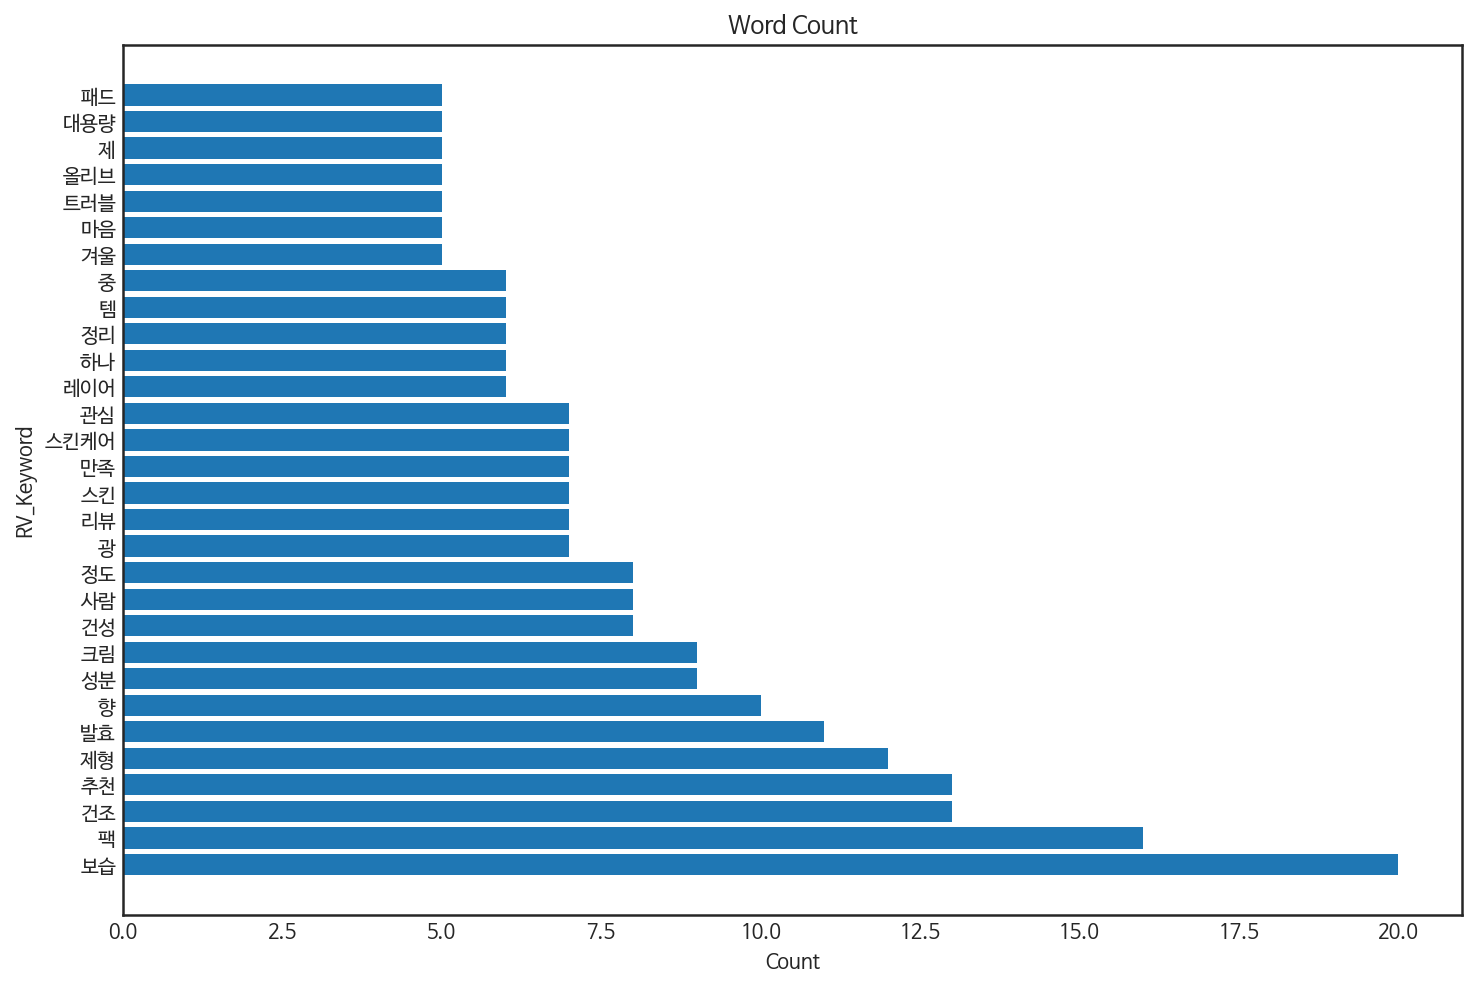

In [16]:
 # 단어 빈도 시각화

 y_pos = np.arange(len(top_nouns))

 plt.figure(figsize=(12, 8))
 plt.barh(y_pos, top_nouns.values())
 plt.title('Word Count')
 plt.ylabel('RV_Keyword')
 plt.xlabel('Count')
 plt.yticks(y_pos, top_nouns.keys())
 plt.show()

# 워드 클라우드
 - 텍스트에 담겨 있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법 (연관성, 의미 구조 X)

In [17]:
# 워드 클라우드

!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from wordcloud import WordCloud
# 클라우드 이미지
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('/content/drive/MyDrive/Colab Notebooks/picture.PNG')
imgArray = np.array(img)

wc = WordCloud(mask = imgArray, background_color = 'white', font_path = './font/NanumBarunGothic.ttf', max_font_size = 100)
wc.generate_from_frequencies(top_nouns)

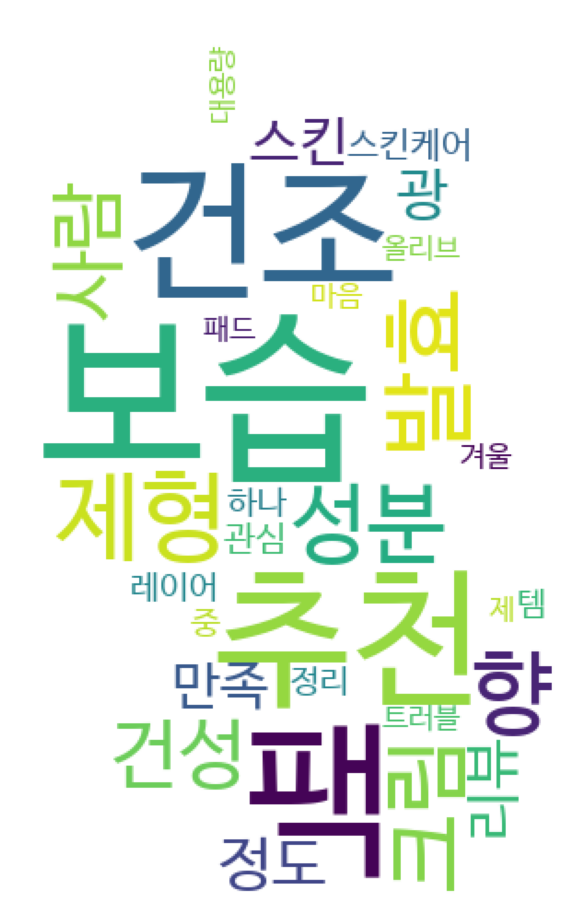

In [30]:
figure = plt.figure(figsize=(5, 16))
ax = figure.add_subplot(1, 1, 1)
ax.axis('off')
ax.imshow(wc)
plt.show()

# squarify 트리맵 시각화
 - 키워드와 키워드 빈도수를 트리맵으로 표현함

In [21]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


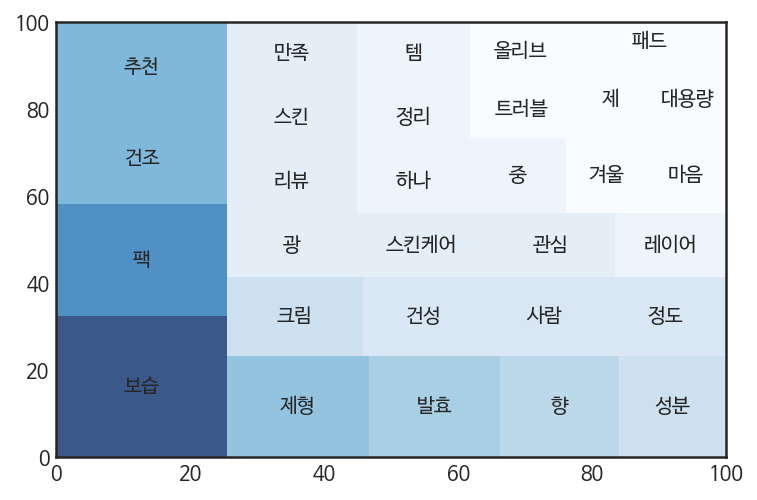

In [22]:
import squarify

norm = mpl.colors.Normalize(vmin = min(top_nouns.values()),
                            vmax=max(top_nouns.values()))
colors = [mpl.cm.Blues(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=.8);

# KeyBERT

In [23]:
!pip install sentence_transformers

!pip install keybert[flair]
!pip install keybert[gensim]
!pip install keybert[spacy]
!pip install keybert[use]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 35.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=2f8e84ca41438e16e1c057b90605b524e8d120fdaef713d5fc810a4566a39093
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence_transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ..

In [24]:
!pip install KeyBERT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from keybert import KeyBERT

In [26]:
# 2차원

def BERT(pname):

    array_text = pd.DataFrame(df[df['pname'] == pname]['rv']).to_numpy()

    bow = []
    
    kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')
    for j in range(len(array_text)):
        keywords = kw_extractor.extract_keywords(array_text[j][0])
        bow.append(keywords)

    new_bow = []
    for i in range(0, len(bow)):
        for j in range(len(bow[i])):
            new_bow.append(bow[i][j])
            
    keyword = pd.DataFrame(new_bow, columns=['keyword', 'weight'])
    print(keyword.groupby('keyword').agg('sum').sort_values('weight', ascending=False).head(5))


In [74]:
# 1차원

def BERT(pname):
    df_filtered = df[df['pname'] == pname]
    array_text = df_filtered['rv'].to_numpy()
    
    kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')
    new_bow = []
    for i in range(len(array_text)):
        keywords = kw_extractor.extract_keywords(array_text[i])
        for keyword, weight in keywords:
            new_bow.append((keyword, weight))
            
    keyword = pd.DataFrame(new_bow, columns=['keyword', 'weight'])
    result = keyword.groupby('keyword').agg('sum').sort_values('weight', ascending=False).head(5)['weight']
    return result

In [77]:
# weigth 제외 

def BERT(pname):
    df_filtered = df[df['pname'] == pname]   # pname 값 가져오기
    array_text = df_filtered['rv'].to_numpy()    # rv 값 가져오기
    
    # keyBERT 클래스 활용해 distilbert-base-nli-mean-tokens 모델 인스턴스 생성
    kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')
    
    new_bow = []   # rv값 추가할 리스트
    
    for i in range(len(array_text)):
        keywords = kw_extractor.extract_keywords(array_text[i])
        for keyword, _ in keywords:
            new_bow.append(keyword)

    # keyword 값들을 빈도수 기준으로 정렬 -> 상위 5개 출력        
    keyword = pd.DataFrame(new_bow, columns=['keyword'])
    print(keyword['keyword'].value_counts().head(5))  

In [105]:
### 키워드만 추출

def BERT(pname):
  df_filtered = df[df['pname'] == pname]   # pname 값 가져오기
  array_text = df_filtered['rv'].to_numpy()   # rv 값 가져오기

  # keyBERT 클래스 활용해 distilbert-base-nli-mean-tokens 모델 인스턴스 생성
  kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')

  new_bow = []    # rv값 추가할 리스트
  
  for i in range(len(array_text)):
      keywords = kw_extractor.extract_keywords(array_text[i])
      for keyword, weight in keywords:
          new_bow.append((keyword, weight))

  # keyword 값들을 빈도수 기준으로 정렬 -> 상위 5개 출력          
  keyword = pd.DataFrame(new_bow, columns=['keyword', 'weight'])
  result = keyword.groupby('keyword').agg('sum').sort_values('weight', ascending=False).head(5).index
  return result

In [106]:
BERT('[대용량+미니어처] 넘버즈인 3번 결광가득 에센스 토너 300ml 어워즈 한정기획 (+3번 결광케어 키트 5종 증정)')

Index(['반신반의하며', '만들어준다는', '정착하려구요', '지속적으로', '사용하기에도'], dtype='object', name='keyword')

In [107]:
BERT('낫츠 센텔라스카 연고 일랑일랑 15g')

Index(['분들에게는', '속상합니다', '심각하게', '피지조절만함', '발라주면'], dtype='object', name='keyword')

In [108]:
BERT('아벤느 오 떼르말 300ml 2입 기획')

Index(['사용하기에', '순해요', '번들번들하거나', '올리브영에서', '구매하려다가'], dtype='object', name='keyword')

In [83]:
import pandas as pd

In [84]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pname.csv')
df2.head(5)

,pname
0,[대용량+미니어처] 넘버즈인 3번 결광가득 에센스 토너 300ml 어워즈 한정기획 ...
1,[2022어워즈]아누아 어성초 77 토너 어워즈 한정 기획 (500ml+250ml)
2,[1월한정 초특가] 피지오겔 DMT 로션 200ml 기획(+토너 50ml 증정)
3,[증량] 더랩바이블랑두 저분자 히알루론산 토너(본품500ml+100ml 추가 증정)
4,[대용량] 라운드랩 1025 독도 토너 (본품500ml+100ml 추가 증정)


In [85]:
df2['keyword'] = 'ㅁ'

In [86]:
df2[:0]

,pname,keyword


In [87]:
df2.head(5)

,pname,keyword
0,[대용량+미니어처] 넘버즈인 3번 결광가득 에센스 토너 300ml 어워즈 한정기획 ...,ㅁ
1,[2022어워즈]아누아 어성초 77 토너 어워즈 한정 기획 (500ml+250ml),ㅁ
2,[1월한정 초특가] 피지오겔 DMT 로션 200ml 기획(+토너 50ml 증정),ㅁ
3,[증량] 더랩바이블랑두 저분자 히알루론산 토너(본품500ml+100ml 추가 증정),ㅁ
4,[대용량] 라운드랩 1025 독도 토너 (본품500ml+100ml 추가 증정),ㅁ


In [99]:
# 상품별 키워드 추출
pname_list = df['pname'].unique().tolist()

rv = []
for pname in pname_list[0:3]:
    pname = BERT(pname)
    rv.append(pname)
    print(pname)
   # print()

   # df2파일의 keyword 속성에 추가

Index(['반신반의하며', '만들어준다는', '정착하려구요', '지속적으로', '사용하기에도'], dtype='object', name='keyword')
Index(['토너팩으로', '배신감듭니다', '클린뷰티라고', '사용방법이', '제품들에는'], dtype='object', name='keyword')
Index(['제품입니다', '제품이에요', '복합성', '극건성이신분들이', '사람들에게는'], dtype='object', name='keyword')


In [137]:
### 파일에 저장

pname_list = df['pname'].unique().tolist()  # 중복제거
df2 = pd.DataFrame(columns=['pname', 'keyword'])

for pname in pname_list:
    keyword = BERT(pname)
    df2 = df2.append({'pname': pname, 'keyword': keyword}, ignore_index=True)

df2.to_csv('df222.csv', index=False)

In [88]:
num = 0
print('{0}번째 출력중입니다.'.format(num))

0번째 출력중입니다.


In [110]:
df2[:2]

,pname,keyword
0,[대용량+미니어처] 넘버즈인 3번 결광가득 에센스 토너 300ml 어워즈 한정기획 ...,"Index(['반신반의하며', '만들어준다는', '정착하려구요', '지속적으로', ..."
1,[2022어워즈]아누아 어성초 77 토너 어워즈 한정 기획 (500ml+250ml),"Index(['토너팩으로', '배신감듭니다', '클린뷰티라고', '사용방법이', '..."
